In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [7]:
import plotly.express as px

In [8]:
from matplotlib import style
style.use('ggplot')

In [9]:
import re

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
from nltk.stem import PorterStemmer

In [13]:
from nltk.corpus import stopwords

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Muhammad Tahir
[nltk_data]     Aleem\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
stop_words = set (stopwords.words('english'))

In [18]:
from wordcloud import WordCloud

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
from sklearn.model_selection import train_test_split

In [59]:
train_labeled_data = pd.read_csv("labeledTrainData.tsv", sep="\t")

In [30]:
test_data = pd.read_csv("testData.tsv", sep="\t")

In [32]:
train_unlabeled_data = pd.read_csv("unlabeledTrainData.tsv", sep="\t")

In [60]:
train_labeled_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [61]:
train_labeled_data  = train_labeled_data[['sentiment','review']]

In [62]:
print(f'Train labeled :\n{train_labeled_data.head()}\n\n\n\
Test data :\n{test_data.head()}')

Train labeled :
   sentiment                                             review
0          1  With all this stuff going down at the moment w...
1          1  \The Classic War of the Worlds\" by Timothy Hi...
2          0  The film starts with a manager (Nicholas Bell)...
3          0  It must be assumed that those who praised this...
4          1  Superbly trashy and wondrously unpretentious 8...


Test data :
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...


In [63]:
print(f'Train labeled shape = {train_labeled_data.shape}\nTest data shape = {test_data.shape}')

Train labeled shape = (25000, 2)
Test data shape = (25000, 2)


In [64]:
columns = train_labeled_data.columns
columns

Index(['sentiment', 'review'], dtype='object')

In [65]:
train_labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  25000 non-null  int64 
 1   review     25000 non-null  object
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


Text(0.5, 1.0, 'Sentiment Distribution')

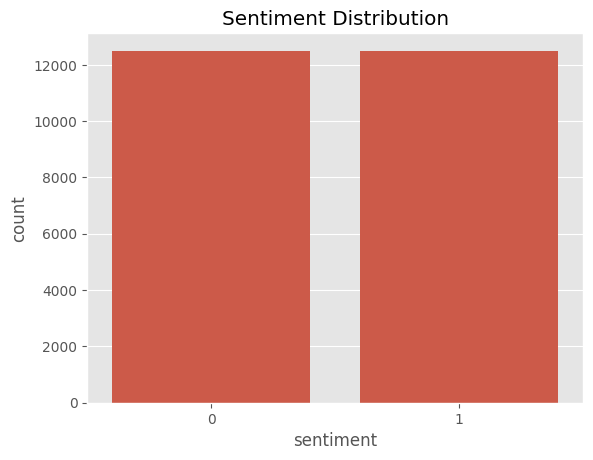

In [55]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")

# Preprocessing

In [66]:
def data_preprocessing(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Muhammad Tahir
[nltk_data]     Aleem\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [67]:
train_labeled_data.review = train_labeled_data['review'].apply(data_preprocessing)

In [68]:
duplicated_count = train_labeled_data.duplicated().sum()
print("number of duplicated enteries", duplicated_count)

number of duplicated enteries 98


In [69]:
train_labeled_data = train_labeled_data.drop_duplicates('review')

# Stemming

In [70]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [71]:
train_labeled_data.review = train_labeled_data['review'].apply(lambda x: stemming(x))

In [72]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count 

In [73]:
train_labeled_data['word count'] = train_labeled_data['review'].apply(no_of_words)

In [82]:
#positive reviews words distribution

In [74]:
positive_reviews = train_labeled_data[train_labeled_data.sentiment == 1]
positive_reviews.head()

,sentiment,review,word count
0,1,stuff going moment mj ive started listening mu...,220
1,1,classic war worlds timothy hines entertaining ...,81
4,1,superbly trashy wondrously unpretentious 80s e...,214
5,1,dont know people think bad movie got pretty go...,44
9,1,movie full references like mad max ii wild one...,24


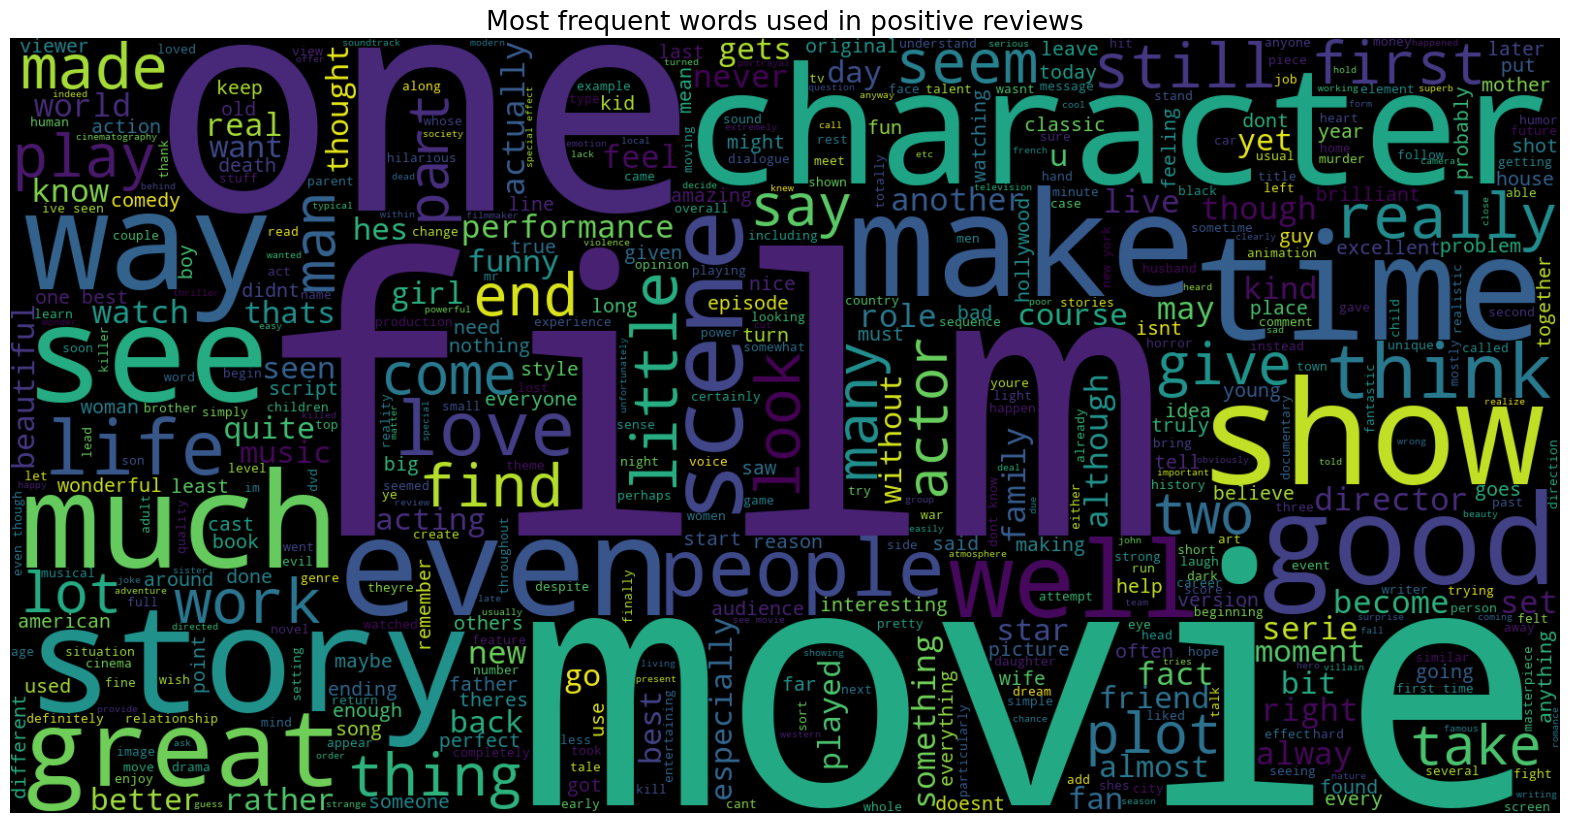

In [75]:
text = ' '.join([word for word in positive_reviews['review']])
plt.figure(figsize=(20,15), facecolor = 'None')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('Most frequent words used in positive reviews', fontsize = 19)
plt.show()

In [78]:
from collections import Counter
count = Counter()
for text in positive_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 19572),
 ('movie', 18113),
 ('one', 12850),
 ('like', 8669),
 ('good', 7359),
 ('story', 6472),
 ('great', 6245),
 ('time', 5992),
 ('see', 5803),
 ('well', 5487),
 ('really', 5428),
 ('also', 5418),
 ('would', 5279),
 ('even', 4808),
 ('much', 4572)]

In [79]:
positive_words = pd.DataFrame(count.most_common(15))
positive_words.columns = ['word', 'count']
positive_words.head()

,word,count
0,film,19572
1,movie,18113
2,one,12850
3,like,8669
4,good,7359


In [90]:
px.bar(positive_words, x = 'count', y = 'word', title = 'Common words in positive reviews', color = 'word')

In [83]:
#negative reviews words distribution

In [85]:
negative_reviews = train_labeled_data[train_labeled_data.sentiment == 0]
negative_reviews.head()

,sentiment,review,word count
2,0,film starts manager nicholas bell giving welco...,233
3,0,must assumed praised film greatest filmed oper...,194
6,0,movie could good comes way short cheesy specia...,57
7,0,watched video friends house im glad waste mone...,70
8,0,friend mine bought film 1 even grossly overpri...,93


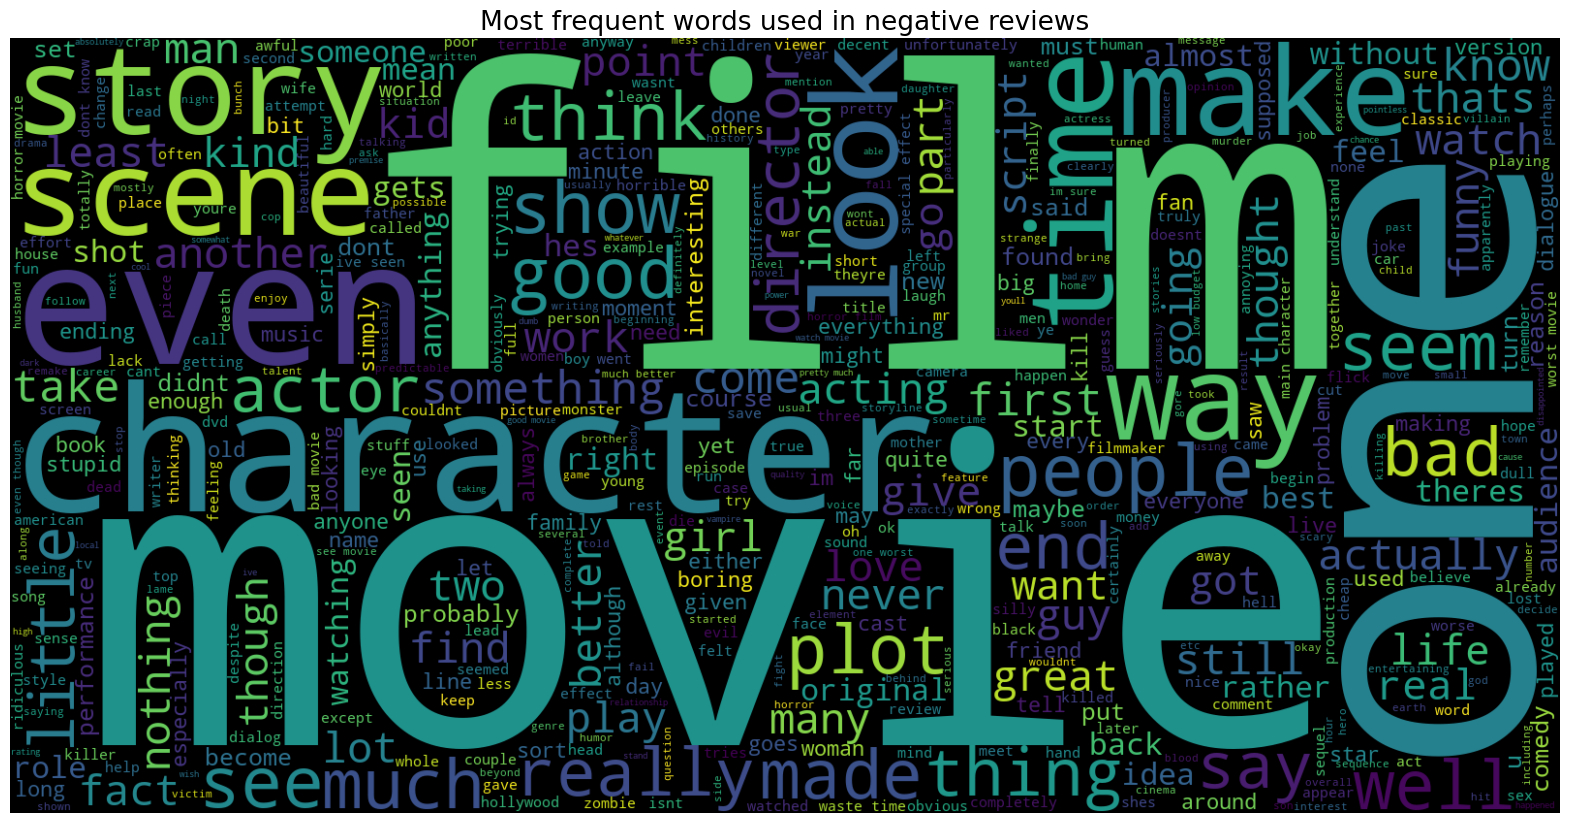

In [86]:
text = ' '.join([word for word in negative_reviews['review']])
plt.figure(figsize=(20,15), facecolor = 'None')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('Most frequent words used in negative reviews', fontsize = 19)
plt.show()

In [87]:
count = Counter()
for text in negative_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 23552),
 ('film', 17792),
 ('one', 12221),
 ('like', 10836),
 ('even', 7478),
 ('good', 7112),
 ('bad', 7030),
 ('would', 6807),
 ('really', 6174),
 ('time', 5732),
 ('see', 5332),
 ('dont', 5020),
 ('get', 4954),
 ('much', 4941),
 ('story', 4924)]

In [88]:
negative_words = pd.DataFrame(count.most_common(15))
negative_words.columns = ['word', 'count']
negative_words.head()

,word,count
0,movie,23552
1,film,17792
2,one,12221
3,like,10836
4,even,7478


In [91]:
px.bar(negative_words, x = 'count', y = 'word', title = 'Common words in negative reviews', color = 'word')

# splitting test and train

In [92]:
X = train_labeled_data['review']
Y = train_labeled_data['sentiment']

In [97]:
vect = TfidfVectorizer()
X = vect.fit_transform(train_labeled_data['review'])

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [102]:
print("size of x_train: ", (x_train.shape))
print("size of y_train: ", (y_train.shape))
print("size of x_test: ", (x_test.shape))
print("size of y_test: ", (y_test.shape))

size of x_train:  (17431, 141985)
size of y_train:  (17431,)
size of x_test:  (7471, 141985)
size of y_test:  (7471,)


# creating Model

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Trying Logistic Regression

In [106]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.23%


In [107]:
#Trying Naive Bayes

In [108]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.45%


In [109]:
#Trying SVM

In [110]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 88.58%


In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_svc = grid_search.best_estimator_

In [116]:
print("best cross validation score: {:.2f}".format(grid.best_score_*100))
print("best parameters: ", grid.best_params_)

best cross validation score: 88.66
best parameters:  {'C': 1, 'loss': 'hinge'}


In [118]:
#trying Random Forest
from sklearn.ensemble import RandomForestClassifier

ensemble_model = RandomForestClassifier()
ensemble_model.fit(x_train, y_train)

RandomForestClassifier()

In [120]:
# Evaluate the ensemble model
ensemble_pred = ensemble_model.predict(x_test)
ensemble_acc = accuracy_score(ensemble_pred, y_test)
print("Ensemble Model Test Accuracy: {:.2f}%".format(ensemble_acc * 100))

Ensemble Model Test Accuracy: 84.27%


# Testing SVC model with test dataset

In [132]:
trained_model = LinearSVC()

In [129]:
test_data = pd.read_csv("testData.tsv", sep="\t")

In [134]:
test_reviews = test_data['review']

In [137]:
X_test = vect.transform(test_reviews)

In [165]:
random_comment = ["I love this movie"]

In [166]:
def preprocess_comment(comment):
    # Apply the same preprocessing steps as in your training data
    comment = comment.lower()
    comment = re.sub('<br />', '', comment)
    comment = re.sub(r"https\S+|www\S+|http\S+", '', comment, flags=re.MULTILINE)
    comment = re.sub(r'\@w+|\#', '', comment)
    comment = re.sub(r'[^\w\s]', '', comment)
    text_tokens = word_tokenize(comment)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    stemmed_text = [stemmer.stem(word) for word in filtered_text]
    return " ".join(stemmed_text)

In [167]:
random_comment = [preprocess_comment(comment) for comment in random_comment]

In [168]:
random_comment_vectorized = vect.transform(random_comment)

In [169]:
prediction = svc.predict(random_comment_vectorized)

In [170]:
if prediction[0] == 1:
    sentiment = "Positive"
else:
    sentiment = "Negative"

print("Predicted Sentiment: {}".format(sentiment))

Predicted Sentiment: Positive
